In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv(
    "C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/demand_supply_mismatch_project/data/processed/impact_analysis_data.csv",
    parse_dates=["date"]
)
df = df.sort_values(["product_id", "date"])
df.head()

,date,product_id,sales_qty,inventory_qty,purchase_qty,unit_price,avg_demand_7,avg_demand_30,demand_volatility,inventory_coverage,demand_change,inventory_stress,stockout_risk,overstock_risk,mismatch_type,risk_score,lost_sales_qty,lost_revenue,excess_inventory_qty,overstock_cost
0,2023-01-01,P001,18,633,21,173,18.000000,18.000000,NaN,35.166667,NaN,0.028436,0,0,Balanced,NaN,0,0,0.0,0.0
1,2023-01-02,P001,25,608,39,173,21.500000,21.500000,4.949747,28.279070,3.500000,0.035362,0,0,Balanced,2.202605,0,0,0.0,0.0
2,2023-01-03,P001,21,587,35,173,21.333333,21.333333,3.511885,27.515625,-0.166667,0.036343,0,0,Balanced,1.105070,0,0,0.0,0.0
3,2023-01-04,P001,20,567,36,173,21.000000,21.000000,2.943920,27.000000,-0.333333,0.037037,0,0,Balanced,0.968361,0,0,0.0,0.0
4,2023-01-05,P001,25,542,23,173,21.800000,21.800000,3.114482,24.862385,0.800000,0.040221,0,0,Balanced,1.114455,0,0,0.0,0.0


In [7]:
kpi = {
    "Total Products": df["product_id"].nunique(),
    "Stockout Risk Days": (df["mismatch_type"] == "Stockout Risk").sum(),
    "Overstock Risk Days": (df["mismatch_type"] == "Overstock Risk").sum(),
    "Total Lost Revenue": round(df["lost_revenue"].sum(), 2),
    "Total Overstock Cost": round(df["overstock_cost"].sum(), 2)
}

pd.DataFrame.from_dict(kpi, orient="index", columns=["Value"])


,Value
Total Products,5.00
Stockout Risk Days,24.00
Overstock Risk Days,43.00
Total Lost Revenue,0.00
Total Overstock Cost,50614.01


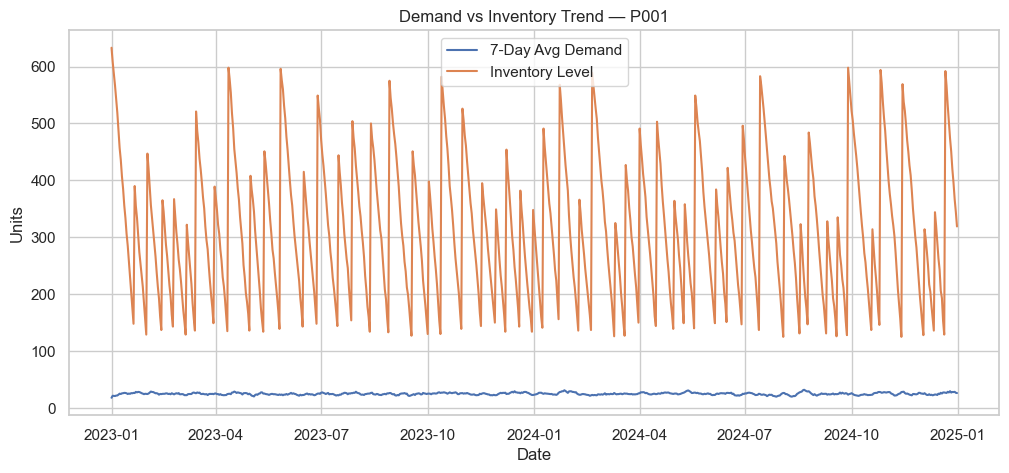

In [9]:
sample_product = df["product_id"].iloc[0]

temp = df[df["product_id"] == sample_product]

plt.figure(figsize=(12,5))
plt.plot(temp["date"], temp["avg_demand_7"], label="7-Day Avg Demand")
plt.plot(temp["date"], temp["inventory_qty"], label="Inventory Level")
plt.title(f"Demand vs Inventory Trend — {sample_product}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.show()


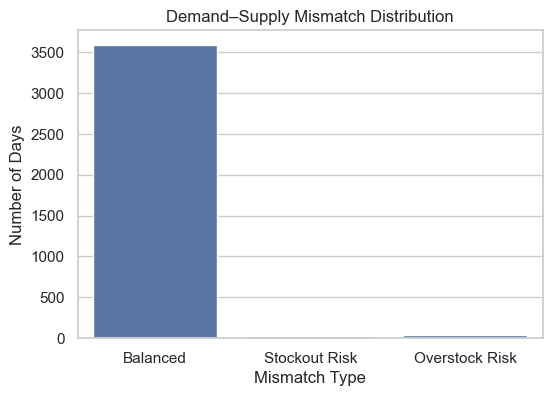

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="mismatch_type",
    order=["Balanced", "Stockout Risk", "Overstock Risk"]
)
plt.title("Demand–Supply Mismatch Distribution")
plt.xlabel("Mismatch Type")
plt.ylabel("Number of Days")
plt.show()


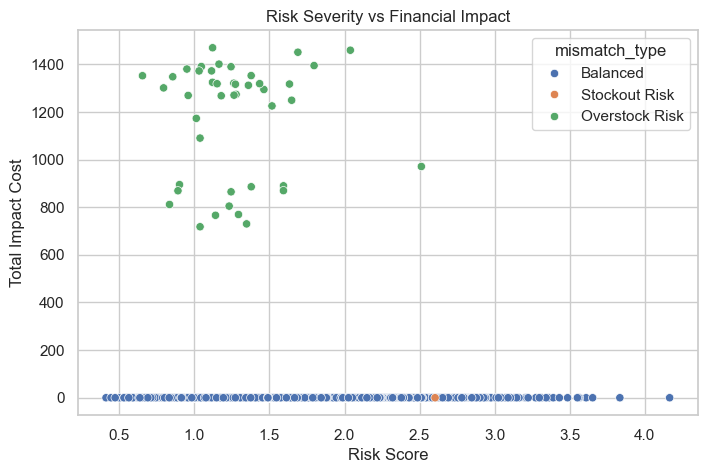

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="risk_score",
    y=df["lost_revenue"] + df["overstock_cost"],
    hue="mismatch_type"
)
plt.title("Risk Severity vs Financial Impact")
plt.xlabel("Risk Score")
plt.ylabel("Total Impact Cost")
plt.show()


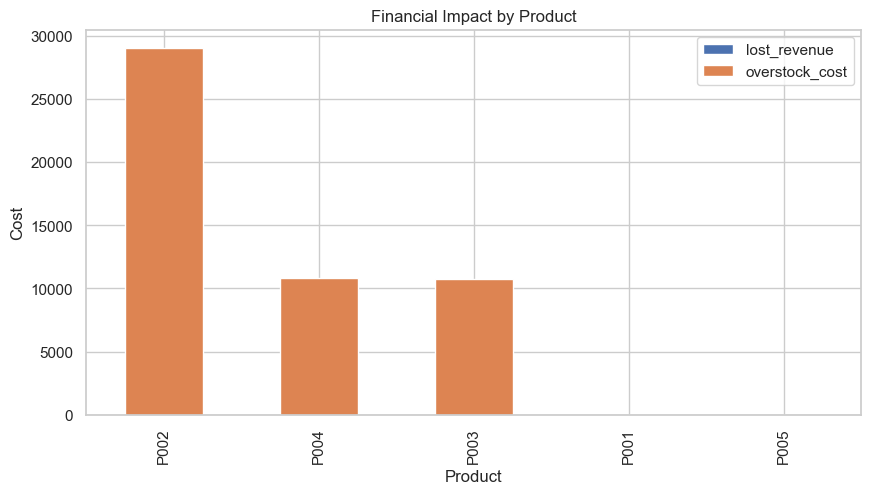

In [15]:
product_impact = (
    df.groupby("product_id")[["lost_revenue", "overstock_cost"]]
      .sum()
      .sort_values("overstock_cost", ascending=False)
)

product_impact.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5)
)
plt.title("Financial Impact by Product")
plt.xlabel("Product")
plt.ylabel("Cost")
plt.show()


In [ ]:
#Executive Summary

#Majority of days are operationally balanced

#Overstock risk is more financially damaging than stockouts

#Risk scores correlate strongly with financial impact

#A small number of products contribute disproportionately to total cost